# Youtube Video & Channel Data Analysis
By Pin-Huey Chiang, Hung-Yi Lin

**This data analysis provided information for people who wants to become Youtuber of how to earn money and become a successful Youtuber.**

**Possible factors to become a successful Youtuber:**
1. Youtube channel types (types that most people like to watch)
2. Have many subscribers and video views 
3. Youtube channels that have more trending videos

**Four measurements of whether a Youtube channel is successful:**
1. Amount of money they earned
2. Number of subscribers
3. Number of video views
4. Number of trending videos

## Hypothesis
1. Top 250 ranking Youtubers (by grade, subs, views) in the U.S. will have more chances to earn more money than office workers
2. As a full-time Youtuber, it will be more profitable to film entertainment videos than other types of videos such as comedy, music, fashion, knowledge, and etc
3. Entertainment videos will likely to trend more than other types of videos such as comedy, music, fashion, knowledge, and etc
4. The video category that has the most trending videos will have more subscribers than other categories. 
    - Does more trending videos make them enter top 250 us youtubers
    - On the other hand, does top 250 youtubers (by grade, subs, views) means they have they most trending videos 
    - does more subscribers means more video views (have relationship???)

**Part 2: What video types people like the most? / Is there a relationship between trending videos and Top 250 Youtubers?**

## Hypothesis 3
### Entertainment videos will likely to trend more than other types of videos such as comedy, music, fashion, knowledge.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
trending_df = pd.read_csv('data/USvideos.csv')
category_id = pd.read_json('data/US_category_id.json')

In [3]:
len(trending_df)

40949

### Data Preprocessing of Trending Video Dataset
1. change category id to category name based on the US_category_id.json file
2. change the trending date and trending time to pandas timestamp

In [4]:
# replace category id to category name from json file 
# import category_id json file and dataframe 
def catId_to_name(catid, videodf):
    # catid: category id json file, videodf = video dataframe
    cat_dict = {}
    for i in range(len(catid)):
        id = int(category_id['items'][i]['id'])
        name = catid['items'][i]['snippet']['title']
        cat_dict[id] = name
    return cat_dict

In [5]:
category_dict = catId_to_name(category_id, trending_df)

In [6]:
trending_df['category_name'] = trending_df['category_id'].replace(category_dict)

In [7]:
trending_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [8]:
# change publish time type to datetime
trending_df['publish_time'] = trending_df.publish_time.str[:10]
trending_df['publish_time'] = pd.to_datetime(trending_df['publish_time'])

In [9]:
# change date format to datetime format
trending_df['trending_date'] = trending_df['trending_date'].apply(lambda date: re.sub(r'(\d+).(\d+).(\d+)', r'20\1-\3-\2', date))

In [10]:
trending_df['trending_date'] = pd.to_datetime(trending_df['trending_date'])

### Trending Video Analysis

Show the earliest and latest video publish date, earliest and latest video trending data

In [11]:
min(trending_df['publish_time']), max(trending_df['publish_time']) 

(Timestamp('2006-07-23 00:00:00'), Timestamp('2018-06-14 00:00:00'))

In [12]:
min(trending_df['trending_date']), max(trending_df['trending_date']) 
# trending video also represents the data collection date which is from 2017-11-14 to 2018-06-14

(Timestamp('2017-11-14 00:00:00'), Timestamp('2018-06-14 00:00:00'))

In [13]:
trending_df['days_spent_to_trend'] = trending_df['trending_date'] - trending_df['publish_time']
days = trending_df['days_spent_to_trend'].astype(str).str.split(" ", n = 1, expand = True)
trending_df['days_spent_to_trend'] = days[0].astype(int)
trending_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,days_spent_to_trend
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,1
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,2
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,1
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,2


In [14]:
trending_pi = pd.pivot_table(trending_df, values=['views', 'likes', 'dislikes', 'comment_count', 'video_id', 'days_spent_to_trend'], 
                             index=['category_name'], aggfunc={'views': np.sum, 'likes': np.sum, 'dislikes': np.sum, 
                                                                              'comment_count': np.sum,'video_id': 'count', 'days_spent_to_trend':np.sum})

In [15]:
trending_pi = trending_pi[['video_id', 'views', 'likes', 'dislikes', 'comment_count', 'days_spent_to_trend']]
trending_pi.columns = ['video_count', 'views', 'likes', 'dislikes', 'comment_count', 'days_spent_to_trend']
trending_pi = trending_pi.sort_values('video_count', ascending=False)

In [16]:
trending_pi

,video_count,views,likes,dislikes,comment_count,days_spent_to_trend
category_name,,,,,,
Entertainment,9964,20604388195,530516491,42987663,73566498,129617
Music,6472,40132892190,1416838584,51179008,125296396,95292
Howto & Style,4146,4078545064,162880075,5473899,23149550,32809
Comedy,3457,5117426208,216346746,7230391,22545582,34941
People & Blogs,3210,4917191726,186615999,10187901,24778032,50350
News & Politics,2487,1473765704,18151033,4180049,6039433,46213
Science & Technology,2401,3487756816,82532638,4548402,11989926,43612
Film & Animation,2345,7284156721,165997476,6075148,17887060,96286
Sports,2174,4404456673,98621211,5133551,11192155,50992


Entertainment has the most trending videos, music, howto&style(fashion), comedy, people&blogs(daily life), news&politics are other famous videos. 15 categories did not have any trending videos from 2017-11-14 to 2018-06-14. (data collection date)

Although entertainment videos have the most trending videos during the data captured period, it does not mean filming entertainment videos will definitely make your videos trend more. The proportion of "num of trending videos / num of videos upload entertainment" may not be the highest.

However, there is no data to know how many numbers of videos upload during a specific period so it is hard to know the percentage of trending videos among the number of uploads in one category. Therefore, need to find other indicators. Ex: num of views/likes/dislikes/comments in per trending video, average time a video need to spend from publish to upload

In [17]:
# find categories that do not enter the trending videos 
trendcat = list(trending_pi.index)
catList = list(category_dict.values())
not_trend_cat = []
for i in range(len(catList)):
    if catList[i] not in trendcat:
        not_trend_cat.append(catList[i])
print(len(not_trend_cat))
print(not_trend_cat)

15
['Short Movies', 'Videoblogging', 'Movies', 'Anime/Animation', 'Action/Adventure', 'Classics', 'Documentary', 'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Trailers']


In [20]:
trending_pi_avg = trending_pi[['views', 'likes', 'dislikes', 'comment_count', 'days_spent_to_trend']].div(trending_pi['video_count'], axis=0).round(2)
# trending_pi_avg = trending_pi_avg.style.format({
#                         'likes(%)': '{:,.2%}'.format,
#                         'dislikes(%)': '{:,.2%}'.format
#                     })
# trending_pi_avg

,views,likes,dislikes,comment_count,days_spent_to_trend
category_name,,,,,
Entertainment,2067883.20,53243.33,4314.30,7383.23,13.01
Music,6201003.12,218918.20,7907.76,19359.76,14.72
Howto & Style,983730.12,39286.08,1320.28,5583.59,7.91
Comedy,1480308.42,62582.22,2091.52,6521.72,10.11
People & Blogs,1531835.43,58135.83,3173.80,7719.01,15.69
News & Politics,592587.74,7298.36,1680.76,2428.40,18.58
Science & Technology,1452626.75,34374.28,1894.38,4993.72,18.16
Film & Animation,3106250.20,70787.84,2590.68,7627.74,41.06
Sports,2025969.03,45363.94,2361.34,5148.19,23.46


In [23]:
trending_pi_avg['likes(%)'] = trending_pi_avg['likes'] / (trending_pi_avg['likes'] + trending_pi_avg['dislikes'])
trending_pi_avg['dislikes(%)'] = trending_pi_avg['dislikes'] / (trending_pi_avg['likes'] + trending_pi_avg['dislikes'])

In [25]:
trending_pi_avg.columns = ['Avg Views', 'Avg Likes','Avg Dislikes','Avg Comment Count', 'Avg Days Spent to Trend', 'Likes(%)', 'Dislikes(%)']
trending_pi_avg

,Avg Views,Avg Likes,Avg Dislikes,Avg Comment Count,Avg Days Spent to Trend,Likes(%),Dislikes(%)
category_name,,,,,,,
Entertainment,2067883.20,53243.33,4314.30,7383.23,13.01,0.925044,0.074956
Music,6201003.12,218918.20,7907.76,19359.76,14.72,0.965137,0.034863
Howto & Style,983730.12,39286.08,1320.28,5583.59,7.91,0.967486,0.032514
Comedy,1480308.42,62582.22,2091.52,6521.72,10.11,0.967660,0.032340
People & Blogs,1531835.43,58135.83,3173.80,7719.01,15.69,0.948233,0.051767
News & Politics,592587.74,7298.36,1680.76,2428.40,18.58,0.812815,0.187185
Science & Technology,1452626.75,34374.28,1894.38,4993.72,18.16,0.947768,0.052232
Film & Animation,3106250.20,70787.84,2590.68,7627.74,41.06,0.964694,0.035306
Sports,2025969.03,45363.94,2361.34,5148.19,23.46,0.950522,0.049478


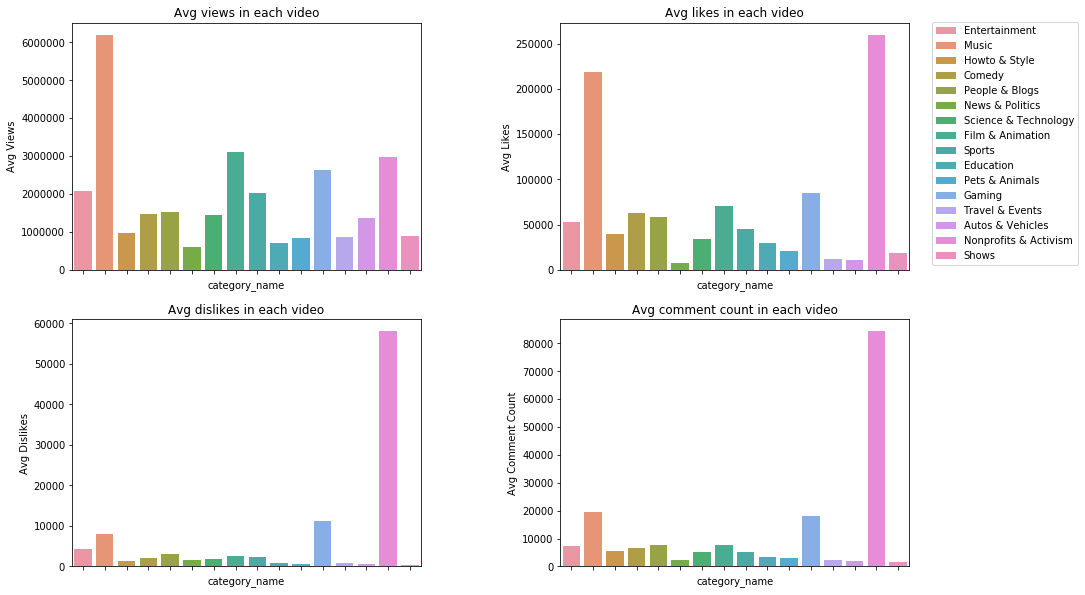

In [31]:
colname = ['Avg Views', 'Avg Likes','Avg Dislikes','Avg Comment Count']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(colname):
    if i != len(colname)-1:
        sns.barplot(data = trending_pi_avg, x = trending_pi_avg.index, y = col, ax=axes[i // 2, i % 2])
    else:
        sns.barplot(data = trending_pi_avg, x = trending_pi_avg.index, y = col, ax=axes[i // 2, i % 2], hue=trending_pi_avg.index, dodge=False)
    axes[i // 2, i % 2].set_xticklabels('')
    axes[i // 2, i % 2].set_title(colname[i].capitalize()+ ' in each video')


fig.subplots_adjust(wspace=.4)
plt.legend(bbox_to_anchor=(1.05, 2.225), loc=2, ncol=1)

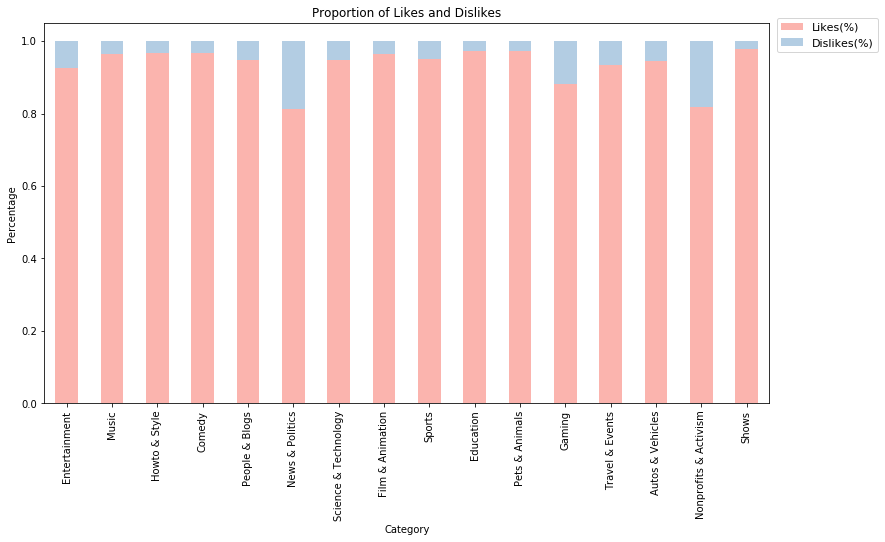

In [27]:
colors = plt.cm.Pastel1(np.linspace(0, 1, 10))
ax = trending_pi_avg[['Likes(%)', 'Dislikes(%)']].plot(kind='bar', stacked=True, align='center', figsize=(13,7),
                                                       color=colors,title='Proportion of Likes and Dislikes')
ax.set_xlabel("Category")
ax.set_ylabel("Percentage")
ax.set_xticklabels(trending_pi_avg.index)
plt.legend(loc=(1.01, 0.923),prop={'size':11})
ax

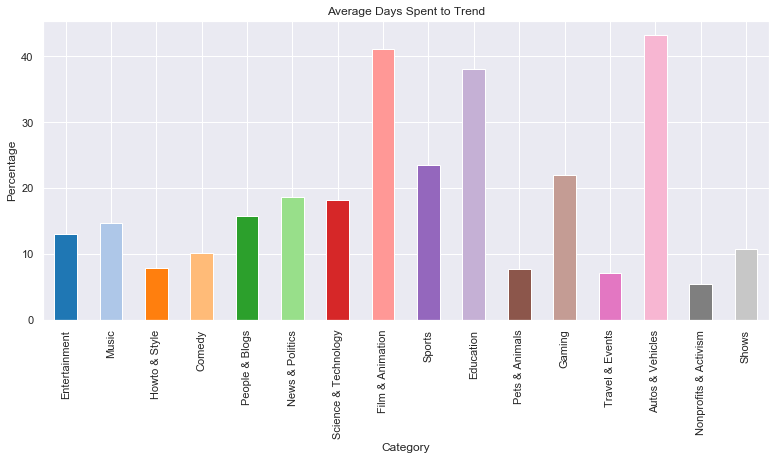

In [44]:
# sns.barplot(data = trending_pi_avg, x = trending_pi_avg.index, y = 'Avg Days Spent to Trend', dodge=False)
# sns.set(rc={'figure.figsize':(20,5)})


colors = plt.cm.tab20(np.linspace(0, 1, 20))
ax = trending_pi_avg['Avg Days Spent to Trend'].plot(kind='bar', align='center', figsize=(13,5.5),
                                                       color=colors,title='Average Days Spent to Trend')
ax.set_xlabel("Category")
ax.set_ylabel("Percentage")
ax.set_xticklabels(trending_pi_avg.index)
ax

Although nonprofits & activism have less trending video counts, but its average likes, dislikes, number of comments per video is the highests, and the days it spend to trend are shorter than most of the categories. 

In [ ]:
#box plot -> df(df before pivot chart ).describe each category, 5 box plots
# x: category, y: value of views, counts, days... 

In [ ]:
# heat map -> see the number of trendings in each cat in each month